# 1. Imports + Mounting Drive


In [ ]:
#TensorFlow
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications.inception_v3 import InceptionV3

#Sklearn
from sklearn.preprocessing import normalize

#Colab + Mounting Drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

#Utilities
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from pathlib import Path
from PIL import Image

Mounted at /content/drive


# 2. Loading the Inception Network

In [ ]:
network = InceptionV3(include_top=False, weights='imagenet', pooling='avg')
network.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)           

# 3. Getting the Birds Dataset - Saving to Drive the Dataset and the Descriptors





In [ ]:
#Installing Kaggle (Only once - don't execute this code)
! pip install -q kaggle
! gdown --id 1mS6lvLAS6vGGviB2XX-zDlsIcdFYurzk
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! rm kaggle.json 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mS6lvLAS6vGGviB2XX-zDlsIcdFYurzk
To: /content/kaggle.json
100% 74.0/74.0 [00:00<00:00, 121kB/s]


In [ ]:
#Fetching the dataset and saving it to drive (Only Once - don't run this code, the dataset will be loaded from the Drive from now on)
! kaggle datasets download -d gpiosenka/100-bird-species -p /content/drive/MyDrive/MIRCVProject/Datasets/Birds

 99% 1.68G/1.69G [00:22<00:00, 104MB/s]
100% 1.69G/1.69G [00:22<00:00, 80.0MB/s]


In [ ]:
#Fetching the dataset from drive into the runtime
! gdown --id 1SbHWZBmgEj6PIPthx8wU6ZHPl-nWPG4Z
! mkdir -p data && unzip -q -d data 100-bird-species.zip
! rm 100-bird-species.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1SbHWZBmgEj6PIPthx8wU6ZHPl-nWPG4Z 

unzip:  cannot find or open 100-bird-species.zip, 100-bird-species.zip.zip or 100-bird-species.zip.ZIP.
rm: cannot remove '100-bird-species.zip': No such file or directory


In [ ]:
#Extracting Metadata and Making it Ready to use directly

annot = pd.read_csv('data/birds.csv')

train = annot[annot['data set'] == 'train']
train['filepaths'] = 'data/' + train['filepaths']
train = train.reset_index(drop=True)

valid = annot[annot['data set'] == 'valid']
valid['filepaths'] = 'data/' + valid['filepaths']
valid = valid.reset_index(drop=True)

test = annot[annot['data set'] == 'test']
test['filepaths'] = 'data/' + test['filepaths']
test = test.reset_index(drop=True)
train, valid, test

train.to_csv('/content/drive/MyDrive/MIRCVProject/Datasets_metadata/Birds/train.csv', index=False)
valid.to_csv('/content/drive/MyDrive/MIRCVProject/Datasets_metadata/Birds/valid.csv', index=False)
test.to_csv('/content/drive/MyDrive/MIRCVProject/Datasets_metadata/Birds/test.csv', index=False)

FileNotFoundError: ignored

In [ ]:
#To be consistent with the finetuned sets
#Downloading the test, valid and train csv files into a dataframe
! gdown --id 1hOwriTnQGvdXD4oEia6LSToQb9PWRKc_
! gdown --id 15kBuMF6J61gGSSVk-qroPlQrCKdHQ-Fw
! gdown --id 10lDa-armyrXooo_kpaal6lQpWfrTC4mZ


train = pd.read_csv('training_set.csv')
test = pd.read_csv('test_set.csv')
valid = pd.read_csv('valid_set.csv')

! rm training_set.csv
! rm valid_set.csv
! rm test_set.csv

Downloading...
From: https://drive.google.com/uc?id=1hOwriTnQGvdXD4oEia6LSToQb9PWRKc_
To: /content/training_set.csv
100% 2.24M/2.24M [00:00<00:00, 10.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=15kBuMF6J61gGSSVk-qroPlQrCKdHQ-Fw
To: /content/valid_set.csv
100% 280k/280k [00:00<00:00, 2.50MB/s]
Downloading...
From: https://drive.google.com/uc?id=10lDa-armyrXooo_kpaal6lQpWfrTC4mZ
To: /content/test_set.csv
100% 280k/280k [00:00<00:00, 1.92MB/s]


In [ ]:
train, valid, test

(                                      filepaths                 labels data set
 0               data/train/MALLARD DUCK/119.jpg           MALLARD DUCK    train
 1          data/train/COCK OF THE  ROCK/050.jpg      COCK OF THE  ROCK    train
 2                    data/train/FRIGATE/029.jpg                FRIGATE    train
 3          data/train/AMERICAN REDSTART/056.jpg      AMERICAN REDSTART    train
 4            data/train/POMARINE JAEGER/110.jpg        POMARINE JAEGER    train
 ...                                         ...                    ...      ...
 40460   data/train/CURL CRESTED ARACURI/043.jpg   CURL CRESTED ARACURI    train
 40461       data/train/TURQUOISE MOTMOT/063.jpg       TURQUOISE MOTMOT    train
 40462  data/train/RED BEARDED BEE EATER/002.jpg  RED BEARDED BEE EATER    train
 40463    data/train/WHITE TAILED TROPIC/128.jpg    WHITE TAILED TROPIC    train
 40464      data/train/BAR-TAILED GODWIT/009.jpg      BAR-TAILED GODWIT    train
 
 [40465 rows x 3 columns],

In [ ]:
def extract_descriptors(filepaths):
  descriptors = []

  for path in tqdm(filepaths):
    image_data = tf.io.read_file(path)   # read image file
    image = tf.image.decode_image(image_data, channels=3, expand_animations=False)  # decode image data as RGB (do not load whole animations, i.e., GIFs)
    image = tf.image.resize(image, (299, 299)) # resize
    
    image = np.array(image)
    image = np.expand_dims(image, axis=0)   # add batch dimension
    image = image.astype(np.float32)

    image = tf.keras.applications.inception_v3.preprocess_input(image)
    image_descriptor = network.predict(image)
    image_descriptor = image_descriptor.squeeze()   # tf.Tensor to numpy array
    descriptors.append(image_descriptor)
 
  return descriptors

In [ ]:
#Extracting the Descriptors
train_descriptors = np.array(extract_descriptors(train['filepaths']))
valid_descriptors = np.array(extract_descriptors(valid['filepaths']))
test_descriptors = np.array(extract_descriptors(test['filepaths']))

train_descriptors.shape, valid_descriptors.shape, test_descriptors.shape

  0%|          | 0/40465 [00:00<?, ?it/s]

  0%|          | 0/5058 [00:00<?, ?it/s]

  0%|          | 0/5059 [00:00<?, ?it/s]

((40465, 2048), (5058, 2048), (5059, 2048))

In [ ]:
#Saving Descriptors to Drive
np.save("/content/drive/MyDrive/MIRCVProject/Descriptors_NoFineTuning/Birds/train_descriptors_corr", train_descriptors)
np.save("/content/drive/MyDrive/MIRCVProject/Descriptors_NoFineTuning/Birds/valid_descriptors_corr", valid_descriptors)
np.save("/content/drive/MyDrive/MIRCVProject/Descriptors_NoFineTuning/Birds/test_descriptors_corr", test_descriptors)

# 4. Getting the distractor Dataset - Saving to Drive the Dataset and the Descriptors

In [ ]:
#Getting the distractor to our drive (Don't run the line below)
#! gdown --id 1InYiFhcY3Ev3HbC-9EHNvW5T1pXLoK-B -O /content/drive/MyDrive/MIRCVProject/Datasets/Distractor

#Fetch the distractor into the runtime 
! gdown --id 1-CRBzlwToF2YkiZ9C3Vz6nIvR_AmcS8N
! unzip -q DistractormY2pWptmp
! rm DistractormY2pWptmp

Downloading...
From: https://drive.google.com/uc?id=1-CRBzlwToF2YkiZ9C3Vz6nIvR_AmcS8N
To: /content/DistractormY2pWptmp
100% 3.08G/3.08G [00:55<00:00, 55.7MB/s]


In [ ]:
#Generate a dataframe containing the image paths
image_paths = Path('mirflickr25k/mirflickr').rglob('*.jpg')
image_paths = sorted(image_paths)
distractor = pd.DataFrame()
found_images = ['mirflickr25k/mirflickr/'+i.name for i in image_paths]
distractor['filepaths'] = found_images
distractor.to_csv('/content/drive/MyDrive/MIRCVProject/Datasets_metadata/Distractor/distractor.csv', index=False)

distractor

,filepaths
0,mirflickr25k/mirflickr/im1.jpg
1,mirflickr25k/mirflickr/im10.jpg
2,mirflickr25k/mirflickr/im100.jpg
3,mirflickr25k/mirflickr/im1000.jpg
4,mirflickr25k/mirflickr/im10000.jpg
...,...
24995,mirflickr25k/mirflickr/im9995.jpg
24996,mirflickr25k/mirflickr/im9996.jpg
24997,mirflickr25k/mirflickr/im9997.jpg
24998,mirflickr25k/mirflickr/im9998.jpg


In [ ]:
#Extracting Descriptors 
distractor_descriptors = np.array(extract_descriptors(distractor['filepaths']))
np.save("/content/drive/MyDrive/MIRCVProject/Descriptors_NoFineTuning/Distractor/distractor", distractor_descriptors)


  0%|          | 0/25000 [00:00<?, ?it/s]

'\ndistractor_descriptors = extract_descriptors(distractor[\'filepaths\'][18750:])\ndistractor_descriptors = np.array(distractor_descriptors)\nnp.save("/content/drive/MyDrive/MIRCVProject/Descriptors_NoFineTuning/avg/Distractor/distractor2", distractor_descriptors)\n\nd1 = np.load("/content/drive/MyDrive/MIRCVProject/Descriptors_NoFineTuning/avg/Distractor/distractor1.npy")\nd2 = np.load("/content/drive/MyDrive/MIRCVProject/Descriptors_NoFineTuning/avg/Distractor/distractor2.npy")\n\nd = np.concatenate((d1, d2))\nd.shape\n'

# 5. Testing the Extracted Features

In [ ]:
#Downloading the Extracted Features into the runtime
! gdown --id 1tmYwMHToPcXV5dLxRksOLgJKQr3n1W5p
! gdown --id 1b4IWtSK_kFZhGH3Sa2LQMVMjPSDhAydY
! gdown --id 1u7d1Sv06VKijEYoKAMCcTpsjBcHGQSFq


#Downloading the test and train csv files into a dataframe
! gdown --id 1-3QBMtamrpykyq-_I0-IqnjzWJToVUZ5
! gdown --id 1-FSxvneVXA9GjHqgbdOsqnyMqDL9_NfO

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')  

#Loading into a numpy array
descriptors_train = np.load("train_descriptors.npy")
descriptors_test = np.load("test_descriptors.npy")
descriptors_valid = np.load("valid_descriptors.npy")

#Remove the files from runtime
! rm train_descriptors.npy
! rm test_descriptors.npy
! rm valid_descriptors.npy
! rm train.csv
! rm test.csv 

descriptors = np.concatenate([descriptors_train, descriptors_test, descriptors_valid])
descriptors.shape

Downloading...
From: https://drive.google.com/uc?id=1tmYwMHToPcXV5dLxRksOLgJKQr3n1W5p
To: /content/train_descriptors.npy
100% 388M/388M [00:02<00:00, 178MB/s]
Downloading...
From: https://drive.google.com/uc?id=1b4IWtSK_kFZhGH3Sa2LQMVMjPSDhAydY
To: /content/test_descriptors.npy
100% 13.3M/13.3M [00:00<00:00, 49.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1u7d1Sv06VKijEYoKAMCcTpsjBcHGQSFq
To: /content/valid_descriptors.npy
100% 13.3M/13.3M [00:00<00:00, 42.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-3QBMtamrpykyq-_I0-IqnjzWJToVUZ5
To: /content/test.csv
100% 83.9k/83.9k [00:00<00:00, 30.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-FSxvneVXA9GjHqgbdOsqnyMqDL9_NfO
To: /content/train.csv
100% 2.63M/2.63M [00:00<00:00, 84.3MB/s]


(50582, 2048)

COCKATOO


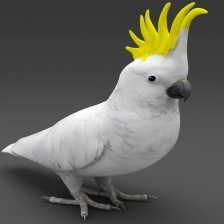

In [ ]:
#Extract an image as a query
query_url = test.filepaths.iloc[405]

# load the image (a PIL.Image object is returned)
query_image_pil = tf.keras.utils.load_img(query_url, interpolation='bilinear')
print(test['labels'][405])
query_image_pil

In [ ]:
#Extract feature vector of query
image_np = np.array(query_image_pil)
image_np = np.expand_dims(image_np, axis=0)   # add batch dimension
image_np = image_np.astype(np.float32)
# preprocessing
image_np = tf.keras.applications.inception_v3.preprocess_input(image_np)
bird_descriptor = network(image_np)     
bird_descriptor = bird_descriptor.numpy()   # tf.Tensor to numpy array
query_descriptor = bird_descriptor

In [ ]:
#Compute 10NN to query
db = normalize(descriptors_train, axis=1)
q = normalize(query_descriptor, axis=1)

k = 10
scores = q.dot(db.T).squeeze()
rank = scores.argsort()[::-1] #descending scores
topk = rank[:k]
print(topk)

[11721 11753 11685 11733 11700 11671 11786 11793 11791 11802]


In [ ]:
from IPython.display import display
from ipywidgets import HBox, Image, HTML


def display_image(image_path, title='', txt=''):
  """ Displays an image with optional title and text next to it using iPython
  widgets (works in Jupyter/Colab environments).
      
  Args:
    image_path (string): path to the image to show.
    title (string): header text to show next to the image.
    txt (string): text to show under the title header.
  """
  image_widget = Image.from_file(image_path, width=200, height=100)
  txt = txt.replace('\n', '<br>')
  text_widget = HTML('<p><b>{}</b></p><p>{}</p>'.format(title, txt))
  widget = HBox([image_widget, text_widget])
  display(widget)

def show_results(image_paths, scores, captions=None):
  """
  Shows results of a similarity search. Lists of image paths, scores, and
  (optionally) captions must be of the same length and follow the same order.

  Args:
    image_paths (ndarray or list): ordererd paths of images to be shown.
    scores (ndarray or list): ordered scores values to be shown next to images.
    captions (ndarray or list): ordered strings of captions to be shown; if
                                None, no caption is shown. Defaults to None.
  
  """
  if captions is None:
    captions = [''] * len(scores)  # just all empty strings

  for image_path, score, caption in zip(image_paths, scores, captions):
    title = 'score: {:.3f}'.format(score)
    display_image(image_path, title, caption)

In [ ]:
#show results
topk_image_paths = train['filepaths'][topk]
topk_scores = scores[topk]
topk_captions = train['labels'][topk]

show_results(topk_image_paths, topk_scores, topk_captions)